In [1]:
%matplotlib inline
import sys
sys.path.append('..')

from vec import Vec
from mat import Mat
from vecutil import list2vec
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 10.3.6

v = [4,5,3,7,4,5,9,7,2,3,3,5,0,0,0,0]

vnew = [(v[2*i] + v[2*i + 1]) / 2 for i in range(len(v)//2)]

w = [v[2*i] - v[2*i + 1] for i in range(len(v)//2)]

print(vnew)
print(w)

[4.5, 5.0, 4.5, 8.0, 2.5, 4.0, 0.0, 0.0]
[-1, -4, -1, 2, -1, -2, 0, 0]


In [3]:
# 10.6.4

def W(w, n):
    R = set(range(n))
    return Mat((R, R), {(r, c): w**(r*c) for r in R for c in R})

In [4]:
import cmath

n = 3
w = cmath.exp(2*cmath.pi*1j/n)
w_inverse = cmath.exp(-2*cmath.pi*1j/n)

W3 = W(w, n)
W3_inverse = W(w_inverse, n)
I3 = W3 * W3_inverse

print(W3)
print(W3_inverse)
print(I3)


            0                                         1                                         2
     --------------------------------------------------------------------------------------------
 0  |  (1+0j)                                    (1+0j)                                    (1+0j)
 1  |  (1+0j) (-0.4999999999999998+0.8660254037844388j) (-0.5000000000000006-0.8660254037844385j)
 2  |  (1+0j) (-0.5000000000000006-0.8660254037844385j) (-0.4999999999999991+0.8660254037844395j)


            0                                         1                                         2
     --------------------------------------------------------------------------------------------
 0  |  (1+0j)                                    (1+0j)                                    (1+0j)
 1  |  (1+0j) (-0.4999999999999998-0.8660254037844388j) (-0.5000000000000006+0.8660254037844385j)
 2  |  (1+0j) (-0.5000000000000006+0.8660254037844385j) (-0.4999999999999991-0.8660254037844395j)


               

In [5]:
# 10.6.7

def FFT(w, s):
    n = len(s)
    if n == 1: return [s[0]]
    f0 = FFT(w*w, [s[i] for i in range(n) if i % 2 == 0])
    f1 = FFT(w*w, [s[i] for i in range(n) if i % 2 == 1])
    return [f0[j] + w**j*f1[j] for j in range(n//2)] + [f0[j] + w**(j+n//2)*f1[j] for j in range(n//2)]

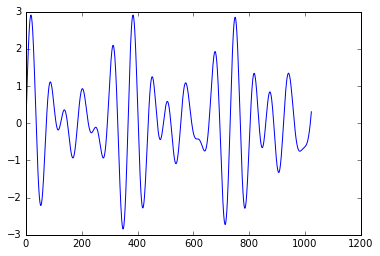

(0.9999811752826011+0.006135884649154475j)


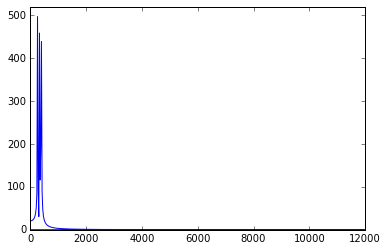

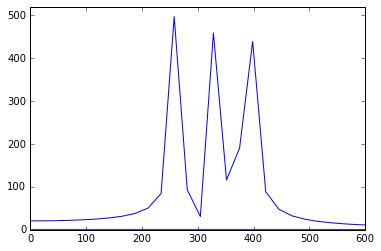

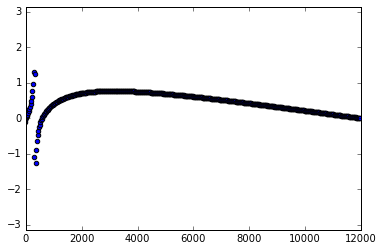

In [6]:
import math

def sin_wave(x, amplitude, frequency, sampling_frequency):
    return amplitude * np.sin(2*np.pi*frequency/sampling_frequency*x)

sampling_rate = 24000
n_fft = 1024

f_doh = 262
f_mi = 330
f_so = 392

x = np.arange(n_fft)
y = sin_wave(x, 1, f_doh, sampling_rate) + sin_wave(x, 1, f_mi, sampling_rate) + sin_wave(x, 1, f_so, sampling_rate)

plt.plot(x, y)
plt.show()

w = cmath.exp(2*np.pi*1j/n_fft)
print(w)

fft = FFT(w, y)

freq_list = np.fft.fftfreq(n_fft, d=1.0/sampling_rate) 
amplitude_spectrum = [math.sqrt(c.real**2 + c.imag**2) for c in fft]
phase_spectrum = [math.atan(c.imag/c.real) for c in fft]
plt.plot(freq_list, amplitude_spectrum)
plt.axis([0, sampling_rate/2, 0, 520])
plt.show()
plt.plot(freq_list, amplitude_spectrum)
plt.axis([0, 600, 0, 520])
plt.show()
plt.scatter(freq_list, phase_spectrum)
plt.axis([0, sampling_rate/2, -math.pi, math.pi])
plt.show()

In [7]:
# assignment 10.9.1

def forward_no_normalization(v):
    D = {}
    while len(v) > 1:
        k = len(v)
        vnew = [(v[2*i] + v[2*i+1])/2 for i in range(len(v)//2)]
        w = [(v[2*i] - v[2*i+1]) for i in range(len(v)//2)]
        D.update({(k//2, i): w[i] for i in range(k//2)})
        v = vnew
    D[(0,0)] = v[0]
    return D

In [8]:
print(forward_no_normalization([1,2,3,4]))
v = [4,5,3,7,4,5,9,7,2,3,3,5,0,0,0,0]
print(forward_no_normalization(v))
v = [0, 1, 1, 1, -1, 1, 0, 1, 100, 101, 102, 100, 101, 100, 99, 100]
print(forward_no_normalization(v))

{(2, 0): -1, (1, 0): -2.0, (0, 0): 2.5, (2, 1): -1}
{(8, 3): 2, (0, 0): 3.5625, (8, 2): -1, (8, 1): -4, (4, 1): -3.5, (4, 3): 0.0, (8, 0): -1, (2, 1): 3.25, (2, 0): -1.5, (8, 7): 0, (4, 2): -1.5, (8, 6): 0, (1, 0): 3.875, (4, 0): -0.5, (8, 5): -2, (8, 4): -1}
{(8, 3): -1, (0, 0): 50.4375, (8, 2): -2, (8, 1): 0, (4, 1): -0.5, (4, 3): 1.0, (8, 0): -1, (2, 1): 0.75, (2, 0): 0.5, (8, 7): -1, (4, 2): -0.5, (8, 6): 1, (1, 0): -99.875, (4, 0): -0.5, (8, 5): 2, (8, 4): -1}


In [9]:
# assignment 10.9.1

def normalize_coefficients(n, D):
    d = {(s, i): math.sqrt(n/(4.0*s))*v for ((s, i), v) in D.items() if s != 0}
    d[(0, 0)] = D[(0, 0)]*math.sqrt(n)
    return d

In [10]:
print(normalize_coefficients(4, {(2,0):1, (2,1):1, (1,0):1, (0,0):1}))
print(normalize_coefficients(4, forward_no_normalization([1,2,3,4])))

{(2, 0): 0.7071067811865476, (1, 0): 1.0, (0, 0): 2.0, (2, 1): 0.7071067811865476}
{(2, 0): -0.7071067811865476, (1, 0): -2.0, (0, 0): 5.0, (2, 1): -0.7071067811865476}


In [11]:
# assignment 10.9.3

def forward(v):
    n = len(v)
    return normalize_coefficients(n, forward_no_normalization(v))

In [12]:
forward([1,2,3,4])

{(0, 0): 5.0,
 (1, 0): -2.0,
 (2, 0): -0.7071067811865476,
 (2, 1): -0.7071067811865476}

In [13]:
# assignment 10.9.4

def suppress(D, threshold):
    return {k: v if (abs(v) >= threshold) else 0 for (k, v) in D.items()}

In [14]:
suppress(forward([1,2,3,4]), 1)

{(0, 0): 5.0, (1, 0): -2.0, (2, 0): 0, (2, 1): 0}

In [15]:
# assignment 10.9.5

def sparsity(D):
    n = len(D)
    return sum([1 for v in D.values() if v != 0]) / n

In [16]:
D = forward([1,2,3,4])
print(D)
print(sparsity(D))
print(sparsity(suppress(D, 1)))

{(2, 0): -0.7071067811865476, (1, 0): -2.0, (0, 0): 5.0, (2, 1): -0.7071067811865476}
1.0
0.5


In [17]:
# assignment 10.9.6

def unnormalize_coefficients(n, D):
    d = {(s, i): v/math.sqrt(n/(4.0*s)) for ((s, i), v) in D.items() if s != 0}
    d[(0, 0)] = D[(0, 0)]/math.sqrt(n)
    return d

In [18]:
print(unnormalize_coefficients(4, normalize_coefficients(4, {(2,0):1, (2,1):1, (1,0):1, (0,0):1})))
d = forward_no_normalization([1,2,3,4])
print(d)
print(unnormalize_coefficients(4, normalize_coefficients(4, d)))

{(2, 0): 1.0, (1, 0): 1.0, (0, 0): 1.0, (2, 1): 1.0}
{(2, 0): -1, (1, 0): -2.0, (0, 0): 2.5, (2, 1): -1}
{(2, 0): -1.0, (1, 0): -2.0, (0, 0): 2.5, (2, 1): -1.0}


In [91]:
# assignment 10.9.7

def backward_no_normalization(D):
    n = len(D)
    v = [D[(0,0)]]
    while len(v) < n:
        l = len(v)
        k = 2 * l
        vnew = sum([[(2*v[i] + D[l, i])/2, (2*v[i] - D[l, i])/2] for i in range(l)], []) # k-length list
        v = vnew
    return v

In [89]:
print(forward_no_normalization([1,2,3,4]))
print(backward_no_normalization(forward_no_normalization([1,2,3,4])))
v = [4,5,3,7,4,5,9,7,2,3,3,5,0,0,0,0]
print(forward_no_normalization(v))
print(backward_no_normalization(forward_no_normalization(v)))
v = [0, 1, 1, 1, -1, 1, 0, 1, 100, 101, 102, 100, 101, 100, 99, 100]
print(forward_no_normalization(v))
print(backward_no_normalization(forward_no_normalization(v)))


{(2, 0): -1, (1, 0): -2.0, (0, 0): 2.5, (2, 1): -1}
[1.0, 2.0, 3.0, 4.0]
{(8, 3): 2, (0, 0): 3.5625, (8, 2): -1, (8, 1): -4, (4, 1): -3.5, (4, 3): 0.0, (8, 0): -1, (2, 1): 3.25, (2, 0): -1.5, (8, 7): 0, (4, 2): -1.5, (8, 6): 0, (1, 0): 3.875, (4, 0): -0.5, (8, 5): -2, (8, 4): -1}
[4.0, 5.0, 3.0, 7.0, 4.0, 5.0, 9.0, 7.0, 2.0, 3.0, 3.0, 5.0, 0.0, 0.0, 0.0, 0.0]
{(8, 3): -1, (0, 0): 50.4375, (8, 2): -2, (8, 1): 0, (4, 1): -0.5, (4, 3): 1.0, (8, 0): -1, (2, 1): 0.75, (2, 0): 0.5, (8, 7): -1, (4, 2): -0.5, (8, 6): 1, (1, 0): -99.875, (4, 0): -0.5, (8, 5): 2, (8, 4): -1}
[0.0, 1.0, 1.0, 1.0, -1.0, 1.0, 0.0, 1.0, 100.0, 101.0, 102.0, 100.0, 101.0, 100.0, 99.0, 100.0]


In [92]:
# assignment 10.9.8

def backward(D):
    n = len(D)
    return backward_no_normalization(unnormalize_coefficients(n, D))

In [93]:
backward(forward([1,2,3,4]))

[1.0, 2.0, 3.0, 4.0]

In [94]:
# skip 10.10

problem 10.11

### どのようにして、与えられた基底の表現が k スパースであるような、最も近いベクトルを求めるの か? また、それを求めたい理由は何か?

ベクトルbにもっとも近いkスパースベクトルを$\tilde{b}$とする。kスパースとは０でない要素を高々k個持つことである。

kスパースベクトルは圧縮表現であり、計算量の抑制に役立つ。

$\tilde{b}$は以下のノルムを最小にするベクトルである。

$\|b - \tilde{b}\|$

$\tilde{b}$の求め方の１つは、値の大きな方からk個の要素を残し、それ以外を０とする抑制による圧縮である。

ただし抑制による圧縮ではbが画像だとすると視覚的観点では破壊的圧縮になってしまう。なので代わりに別の基底での表現におけるkスパースベクトルを求めることを試みる方が望ましい。正規直交基底はそのような望ましい基底であり、そのなかでもウェーブレット基底は特別である。

bは直交行列Qを用いて以下のように書ける。

$Qx = b$

列直交行列はノルムを保存するので、$Q\tilde{x} = \tilde{b}$とすると、

$\|b - \tilde{b}\| = \|x - \tilde{x}\|$

よって$\tilde{b}$を求めるのは$\tilde{x}$を求めることと等価である。

### ベクトルとベクトルの座標表現との間の変換を高速に行うアルゴリズムが存在するような基底が欲し かったのはなぜか?

次数ｄ次の多項式fは以下のように書ける。

$f(x) = a_01 + a_1x^1 + a_2x^2 + \dots + a_dx^d$

fは線形関数ではないが、係数ベクトルを引数にとり$x = r$における値を返すgは線形関数で表現できる。

$g((a_01, a_1, \dots, a_d)) = a_0 + a_1r^1 + a_2r^2 + \dots + a_dr^d$

$ = \left[\begin{array}{cccc}
r^0 & r^1 & \dots r^d
\end{array}\right]
\left[\begin{array}{c}
a_0\\
a_1\\
\vdots\\
a_d
\end{array}\right]$

一般にk個のrに対して、以下のように表現できる。

$g = \left[\begin{array}{cccc}
r_0^0 & r_0^1 & \dots & r_0^d\\
~ & ~ & \vdots & ~\\
r_{k-1}^0 & r_{k-1}^1 & \dots & r_{k-1}^d
\end{array}\right]
\left[\begin{array}{c}
a_0\\
a_1\\
\vdots\\
a_d
\end{array}\right]$

係数（座標）による表現も、値による表現も、それぞれ異なる場面で利点がある。

この２つの表現間を高速に変換する手法として高速フーリエ変換がある。フーリエ行列$F_n$とフーリエ係数$\phi$を用いてサンプル値のベクトルsを以下のようにあらわせる。

$F_n\phi = s$

### ハールウェーブレット基底とは何か? ハールウェーブレット基底はどのように直交補空間と直和の 概念を扱ったか?

$\mathcal{V}^n$の標準基底を$b_0^n, \dots, b_{n-1}^n$とする。

$b_0^n = [1,0,\dots,0]$

$b_{n-1}^n = [0,0,\dots,1]$

$\mathcal{V}^{n/2}$の箱基底を$b_0^{n/2}, \dots, b_{n/2-1}^{n/2}$とする。

$b_0^{n/2} = [1,1,0,\dots,0]$

$b_{n/2-1}^{n/2} = [0,\dots,0,1,1]$

$\mathcal{V}^{n/2}$の$\mathcal{V}^n$における直交補空間を$\mathcal{W}^{n/2}$とする。

$\mathcal{W}^{n/2}$の基底を$w_0^{n/2},\dots,w_{n/2-1}^{n/2}$とすると

$w_0^{n/2} = [\frac{1}{2}, -\frac{1}{2}, 0, \dots, 0]$

$w_{n/2-1}^{n/2} = [0, \dots, 0, \frac{1}{2}, -\frac{1}{2}]$

$\mathcal{V}^n = \mathcal{V}^{n/2} \oplus \mathcal{W}^{n/2}$

この変換を$n/4, n/8,\dots, 2, 1$と繰り返す。

$\mathcal{V}^n = \mathcal{V}^1 \oplus \mathcal{W}^1 \oplus \mathcal{W}^2 \oplus \mathcal{W}^4 \oplus \dots \oplus \mathcal{W}^{n/4} \oplus \mathcal{W}^{n/2}$

つまり$\mathcal{V}^n$の基底は$\mathcal{V}^1, \mathcal{W}^1, \mathcal{W}^2, \mathcal{W}^4, \dots, \mathcal{W}^{n/4}, \mathcal{W}^{n/2}$の基底の和集合である。これらの基底をハールウェーブレット基底といい、ハール基底を与えるベクトルをウェーブレットベクトルという。

ここで$\mathcal{V}^1$の箱基底は

$b_0^1 = [1,1,1,\dots,1,1,1]$

$\mathcal{W}^1, \mathcal{W}^2, \mathcal{W}^4, \dots, \mathcal{W}^{n/2}$の基底を

$\begin{array}{cccccccc}
w_0^{n/2}, & w_1^{n/2}, & w_2^{n/2}, & w_3^{n/2}, & w_4^{n/2}, & \dots, & w_{n/2-2}^{n/2}, & w_{n/2-1}^{n/2}\\
w_0^{n/4}, & w_1^{n/4}, & \dots, & w_{n/4-1}^{n/4} & ~ & ~ & ~ & ~\\
~ & ~ & ~ & \vdots & ~ & ~ & ~ & ~\\
w_0^2, & w_1^2 & ~ & ~ & ~ & ~ & ~ & ~\\
w_0^1 & ~ & ~ & ~ & ~ & ~ & ~ & ~\\
\end{array}$

とする。

$b_0^1, w_0^1, w_0^2, w_1^2, \dots, w_{n/2-1}^{n/2}$がハールウェーブレット基底となる。

### ハールウェーブレット基底で表現されたベクトルの計算の過程はどのようなものか?

$v \in \mathcal{V}^n $のハールウェーブレット基底による表現を導く。

$b_0^n, \dots, b_{n-1}^n$を$\mathcal{V}^n$の箱基底、$w^n_0, \dots, w^n_{n-1}$をウェーブレットベクトルとする。$\mathcal{V}^n = \mathcal{V}^{n/2} \oplus \mathcal{W}^{n/2}$より、

$v = v^{\parallel \mathcal{V}^{n/2}} + v^{\parallel \mathcal{W}^{n/2}}$

$v = \sum x_ib_i^{n/2} + \sum y_iw_i^{n/2}$

$x_i = \frac{v \cdot b_i^{n/2}}{b_i^{n/2} \cdot b_i^{n/2}}$

$y_i = \frac{v \cdot w_i^{n/2}}{w_i^{n/2} \cdot w_i^{n/2}}$

$b_i^{n/2}$は2iと2i+1要素目に１をもちその他は0なので、$v = [v_0, \dots, v_{n-1}]$とすると、

$v \cdot b_i^{n/2} = v_{2i} + v_{2i+1}$

$b_i^{n/2} \cdot b_i^{n/2} = 2$

よって

$x_i = \frac{v_{2i} + v_{2i+1}}{2}$

つまり$b_i^{n/2}$の係数$x_i $は隣接要素の平均として計算できる。

$w_i^{n/2}$は2i要素目に1/2、2i+1要素目に-1/2をもつ。

$y_i = \frac{\frac{1}{2}v_{2i} - \frac{1}{2}v_{2i+1}}{\frac{1}{4} + \frac{1}{4}}$

$y_i = v_{2i} - v_{2i+1}$

つまり$w_i^{n/2}$の係数$y_i $は隣接要素の差として計算できる。

### C 上のベクトルの内積とはどのようなものか?

$\bar{a}$をaの各要素をその複素共役で置き換えたものとすると、

$\langle a,b \rangle = \bar{a} \cdot b$

$\langle a,b \rangle$は非負の実数である。これはノルムの条件に違反しない。

$\mathbb{R}$の内積とは異なり、$\mathbb{C}$の内積は対称ではない。

$\langle a,b \rangle \ne \langle b,a \rangle$

### エルミート共役とは何か?

$\mathbb{C}$の行列Aのエルミート共役$A^H$とは、Aに転置を行い、かつすべての要素を複素共役に置き換えた行列である。

エルミート共役を使えば内積を以下のように表現できる。

$\langle a,b \rangle = a^Hb$

正方行列Aがに対し$A^HA$が単位行列となるとき、Aはユニタリ−行列である。ユニタリ−行列のエルミート共役は自身の逆行列となる。

ユニタリ−行列は$\mathbb{C}$における$\mathbb{R}$上の直交行列に相当するものである。直交行列の転置は自身の逆行列であった。

### 離散フーリエ変換と巡回行列には、どのような関係があるか?

循環行列とは、１行目の各成分を右へ巡回的にずらすことで2,3,..行目が得られるような行列である。

$n\times n$行列Aが以下の性質を満たすとき、循環行列という。

$A[i,j] = A[0, (j-i) \mod n]$

$\omega = e^{2\pi i/n}$とおく。rc要素が$\omega^{r\cdot c}$と等しい行列$W(\omega, n)$を用いると、フーリエ行列は$\mathcal{F}_n = \frac{1}{\sqrt{n}}W(\omega, n)$と書ける。

n = 4のときを考える。巡回行列Aの１行目は、

$A[0,:] = [a_0, a_1, a_2, a_3]$

$W(\omega, 4)$のj行目は、

$W(\omega, 4)[:,j] = [\omega^{0\cdot j}, \omega^{1\cdot j}, \omega^{2\cdot j}, \omega^{3\cdot j}]$

AとWのj列との積を考える。

$Aw_j = \left[\begin{array}{cccc}
a_0 & a_1 & a_2 & a_3\\
a_1 & a_2 & a_3 & a_0\\
a_2 & a_3 & a_0 & a_1\\
a_3 & a_0 & a_1 & a_2
\end{array}\right]
\left[\begin{array}{c}
\omega^{0\cdot j}\\
\omega^{1\cdot j}\\
\omega^{2\cdot j}\\
\omega^{3\cdot j}
\end{array}\right]
$

$ = \left[\begin{array}{c}
a_0\omega^{0\cdot j} + a_1\omega^{1\cdot j} + a_2\omega^{2\cdot j} + a_3\omega^{3\cdot j}\\
a_1\omega^{0\cdot j} + a_2\omega^{1\cdot j} + a_3\omega^{2\cdot j} + a_0\omega^{3\cdot j}\\
a_2\omega^{0\cdot j} + a_3\omega^{1\cdot j} + a_0\omega^{2\cdot j} + a_1\omega^{3\cdot j}\\
a_3\omega^{0\cdot j} + a_0\omega^{1\cdot j} + a_1\omega^{2\cdot j} + a_2\omega^{3\cdot j}
\end{array}\right]
$

$\omega^n = 1$より、$\omega^4 = 1$。よって２行目以降は１行目の$\omega^j$倍で表せる。

$Aw_j = \left[\begin{array}{c}
\omega^{0\cdot j}(a_0\omega^{0\cdot j} + a_1\omega^{1\cdot j} + a_2\omega^{2\cdot j} + a_3\omega^{3\cdot j})\\
\omega^{1\cdot j}(a_0\omega^{0\cdot j} + a_1\omega^{1\cdot j} + a_2\omega^{2\cdot j} + a_3\omega^{3\cdot j})\\
\omega^{2\cdot j}(a_0\omega^{0\cdot j} + a_1\omega^{1\cdot j} + a_2\omega^{2\cdot j} + a_3\omega^{3\cdot j})\\
\omega^{3\cdot j}(a_0\omega^{0\cdot j} + a_1\omega^{1\cdot j} + a_2\omega^{2\cdot j} + a_3\omega^{3\cdot j})
\end{array}\right]
$

$\lambda_j = a_0\omega^{0\cdot j} + a_1\omega^{1\cdot j} + a_2\omega^{2\cdot j} + a_3\omega^{3\cdot j}$とおくと、

$Aw_j = \lambda_j
\left[\begin{array}{c}
\omega^{0\cdot j}\\
\omega^{1\cdot j}\\
\omega^{2\cdot j}\\
\omega^{3\cdot j}
\end{array}\right]
$

よってAとWの積は、

$AW = W\left[\begin{array}{c}
\lambda_0 & 0 & 0 & 0\\
0 & \lambda_1 & 0 & 0\\
0 & 0 & \lambda_2 & 0\\
0 & 0 & 0 & \lambda_3
\end{array}\right]$

$AW = W\Lambda$

フーリエ行列に適用すると、

$AF_n = F_n\Lambda$

$A = F_n\Lambda F_n^{-1}$

これによって積$Av$を計算する代わりに$F_n\Lambda F_n^{-1}v$を計算することができる。$F_n v$, $F_n^{-1} v$はFFTにより$O(n\log n)$で計算可能で、$\Lambda v$は$O(n)$で計算できる。これは$O(n^2)$よりも高速である。

また、

$\Lambda = F_n^{-1} A F_n$

はAの対角化と呼ばれる。